In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D,MaxPooling2D,Reshape
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt 
(x_train, y_train),(x_test, y_test)=mnist.load_data()


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
n_classes=10         # since mnist has 10 classes 

In [4]:
y_train_hot=to_categorical(y_train,num_classes=n_classes)   # to_categorical = into how many classes
                                                             # should a data be broken into

In [5]:
y_test_hot=to_categorical(y_test, num_classes=n_classes)

#### Model creation 

In [20]:
in_layer = Input(shape=(28,28))
reshape= Reshape(target_shape=(28,28,1))(in_layer) # in reality every image is 3d but we have 2d images in
# x_train & y_trains so we have to add an extra feature in x_train & y_train so that every image goes in as 3d 
                                                                                              
conv1 = Conv2D(filters=34, kernel_size=3)(reshape)       
pool_1=MaxPooling2D()(conv1)
conv2 = Conv2D(filters=54, kernel_size=3)(pool_1)       
pool_2=MaxPooling2D()(conv2)
flat = Flatten()(pool_2)
d1= Dense(400, activation="tanh")(flat)
d2= Dense(200, activation="tanh")(d1)
out= Dense(10, activation="softmax")(d2)



In [7]:
model=Model(inputs=in_layer,outputs=out)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 34)        340       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 34)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 54)        16578     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 54)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1350)              0     

In [9]:
model.compile(optimizer="adam",loss= "categorical_crossentropy",metrics=["accuracy"])

In [10]:
model.fit(x_train,y_train_hot,epochs=5,batch_size=1000,steps_per_epoch=20)

Train on 60000 samples
Epoch 1/5
20000/60000 [=========>....................] - ETA: 1:29 - loss: 0.1332 - accuracy: 0.9603

In [15]:
model.evaluate(x_test,y_test_hot,verbose=0)

[0.11911059735566377, 0.9667]

In [22]:
model.layers[2]

##### Another model created from the first model (M2 from model)

In [28]:
M2=Model(inputs = model.input,outputs=model.layers[2].output)

In [29]:
M2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 34)        340       
Total params: 340
Trainable params: 340
Non-trainable params: 0
_________________________________________________________________


In [36]:
out=M2.predict(x_train[:10])

In [55]:
w=M2.layers[2].weights

In [37]:
out.shape

(10, 26, 26, 34)

In [52]:
selected=out[0]

In [53]:
selected.shape

(26, 26, 34)

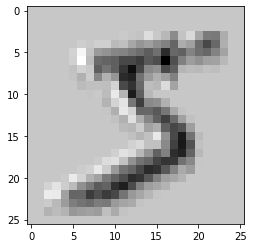

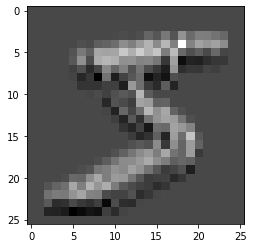

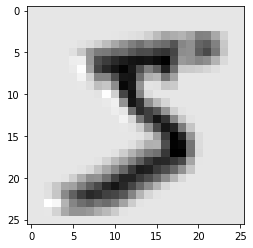

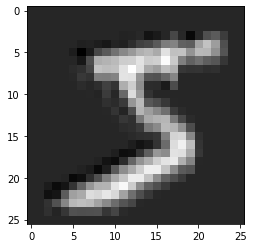

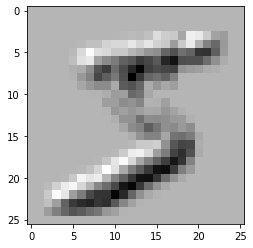

In [54]:
for i in range (5) :
    plt.figure()
    plt.imshow(selected[:,:,i],cmap='gray')
    plt.show()